# 2022년 빅데이터프로세싱

## [10주 2강] 네이버 API를 이용한 크롤링

###[001]네이버 개발자 센터 샘플 코드

In [ ]:
import os
import sys
import urllib.request
 
client_id = "txlnyzjTP8pOiQ2lUpkf" #발급받은 id입력
client_secret = "37YMIvMPT9" #발급받은 pw 입력
 
encText = urllib.parse.quote("월드컵") # 검색단어 입력
url = "https://openapi.naver.com/v1/search/news?query=" + encText # json 결과
 
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
 
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)


{
	"lastBuildDate":"Sat, 09 Jul 2022 23:27:24 +0900",
	"total":2445743,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"K리그1 데뷔골 터트린 '신인' 김성민·슈퍼 세이브 김동헌, 시즌 첫 연패 위기...",
			"originallink":"http:\/\/www.incheonilbo.com\/news\/articleView.html?idxno=1152019",
			"link":"http:\/\/www.incheonilbo.com\/news\/articleView.html?idxno=1152019",
			"description":"김성민은 9일 전주<b>월드컵<\/b>경기장에서 열린 '하나원큐 K리그1 2022' 21라운드 전북과의 대결에서 1대 2로 뒤지던 후반 34분 극적인 동점골을 터트리며 경기를 2대 2 무승부로 끝내는데 결정적인 역할을 했다. 무고사 이적 이후... ",
			"pubDate":"Sat, 09 Jul 2022 23:20:00 +0900"
		},
		{
			"title":"15인제 럭비 대표팀, 아시아 챔피언십서 홍콩에 석패",
			"originallink":"http:\/\/www.stoo.com\/article.php?aid=81192591587",
			"link":"http:\/\/www.stoo.com\/article.php?aid=81192591587",
			"description":"또한 이번 대회 우승팀에 주어지는 100여 년 만의 럭비 <b>월드컵<\/b> 진출도 좌절됐다. 전반을 0-15로 뒤진 채... 득점을 허용하며 아쉽게 패했다. 한국은 오는 9월 남아공에서 열리는 7인제 럭비<b>월드컵<\/b> 준비에 나선다.",
			"pubDate":"Sat, 09 Jul 2022 23:20:00 +0900"
		},
		{
			"title":"인천 홈플러스 물류센터 직원 뇌출혈로 사망...노조 &quot;

###[002] 네이버 뉴스 크롤링(출력)

In [ ]:
import requests
#ID, 키 정보 정의
client_id = "txlnyzjTP8pOiQ2lUpkf" #발급받은 id입력
client_secret = "37YMIvMPT9" #발급받은 pw 입력

# 검색어 입력받기
search_word = input('검색어를 입력하세요:') #검색어

# 요청변수 정의
node = "news" #검색할 대상노드(news, blog, cafearticle, movie, shop 등)
display = 10 #출력 건 수
sort = 'date' #결과값의 정렬기준 시간순 date, 관련도 순 sim
start = 1 # 검색 시작 위치 위치

url = f"https://openapi.naver.com/v1/search/{node}?query={search_word}&display={display}&start={start}&sort={sort}"


#헤더에 아이디와 키 정보 넣기
headers = {'X-Naver-Client-Id' : client_id,'X-Naver-Client-Secret':client_secret}

#URL과 헤더 정보를 포함하여 HTTP 검색 요청 및 응답 객체를 res에 저장
res = requests.get(url, headers=headers)

num = 0
if(res.status_code==200):#상태 코드가 200이면 요청 처리 성공
  data = res.json() # Json 형식으로 변환
  for num, item in enumerate(data['items']):# data를 한 줄 씩 출력 
      num += 1
      print (num, item['title'], item['link'])

else:
    print("Error Code:", res.status_code)


#리스트에 들어있는 요소와 인덱스를 같이 취득하고 싶은 경우에는 enumerate를 사용해 변수를 2개 작성

검색어를 입력하세요:월드컵
1 K리그1 데뷔골 터트린 '신인' 김성민·슈퍼 세이브 김동헌, 시즌 첫 연패 위기... http://www.incheonilbo.com/news/articleView.html?idxno=1152019
2 15인제 럭비 대표팀, 아시아 챔피언십서 홍콩에 석패 http://www.stoo.com/article.php?aid=81192591587
3 인천 홈플러스 물류센터 직원 뇌출혈로 사망...노조 &quot;과로 사망 가능성&quot; https://www.asiatime.co.kr/article/20220709500025
4 실물이 이렇게 다를 수가...잉글랜드, 카타르WC 유니폼 유출본 반응이? https://sports.news.naver.com/news.nhn?oid=413&aid=0000142548
5 한국, U17 여자농구 <b>월드컵</b> 첫 경기서 이집트에 석패 https://sports.news.naver.com/news.nhn?oid=421&aid=0006207314
6 “손흥민, 완전 스크리머 골!” ‘호날두급’ 대접하는 영국 매체, 동호인 축... https://sports.news.naver.com/news.nhn?oid=425&aid=0000130521
7 '추격자' 전북·'도망자' 울산, 모두 무승부…5점 차 간격 유지 https://sports.news.naver.com/news.nhn?oid=468&aid=0000863762
8 '선두' 울산, 대구와 1-1 무승부... 전북도 승점 1 획득에 그쳐 http://www.sporbiz.co.kr/news/articleView.html?idxno=624919
9 [바코 인사이드] 왓킨스 뒤를 이은 원주 골밑의 수호신, 레지 오코사 https://sports.news.naver.com/news.nhn?oid=351&aid=0000059972
10 한국 U17여자농구<b>월드컵</b> 첫 경기 이집트에 분패, 종료 직전 통한의 패스미스,... https://s

###[003] 네이버 뉴스 클로링(엑셀 저장)

In [ ]:
import requests
import openpyxl
import json

client_id = "txlnyzjTP8pOiQ2lUpkf" #발급받은 id입력
client_secret = "37YMIvMPT9" #발급받은 pw 입력

# 검색어 입력받기
search_word = input('검색어를 입력하세요:') #검색어

node = "news"
encode_type = 'json' #출력 방식 json 또는 xml
display = 10 #출력 뉴스 수
sort = 'date' #결과값의 정렬기준 시간순 date, 관련도 순 sim
start = 1 # 출력 위치

url = f"https://openapi.naver.com/v1/search/{node}.{encode_type}?query={search_word}&display={str(int(display))}&start={str(int(start))}&sort={sort}"

#헤더에 아이디와 키 정보 넣기
headers = {'X-Naver-Client-Id' : client_id,'X-Naver-Client-Secret':client_secret}

#HTTP요청 보내기
res = requests.get(url, headers=headers)

#Workbook()으로 엑셀파일 생성
excel_file = openpyxl.Workbook()
#엑셀 시트 생성
excel_sheet = excel_file.active
excel_sheet.column_dimensions['C'].width = 100
excel_sheet.column_dimensions['D'].width = 100
excel_sheet.column_dimensions['E'].width = 100
excel_sheet.append(['랭킹','날짜', '제목', '링크', '설명']) 

num = 0
if(res.status_code==200):
  data = res.json()
  for item in data['items']:
    num += 1
    excel_sheet.append([num, item['pubDate'],item['title'], item['link'], item['description']])
    print (num, item['title'], item['link'])
else:
    print("Error Code:", res.status_code)

#엑셀 파일로 저장
excel_file.save('IT.xlsx') 
# excel_file.save('/content/drive/MyDrive/IT.xlsx')
excel_file.close()


검색어를 입력하세요:월드컵
1 K리그1 데뷔골 터트린 '신인' 김성민·슈퍼 세이브 김동헌, 시즌 첫 연패 위기... http://www.incheonilbo.com/news/articleView.html?idxno=1152019
2 인천 홈플러스 물류센터 직원 뇌출혈로 사망...노조 &quot;과로 사망 가능성&quot; https://www.asiatime.co.kr/article/20220709500025
3 15인제 럭비 대표팀, 아시아 챔피언십서 홍콩에 석패 http://www.stoo.com/article.php?aid=81192591587
4 실물이 이렇게 다를 수가...잉글랜드, 카타르WC 유니폼 유출본 반응이? https://sports.news.naver.com/news.nhn?oid=413&aid=0000142548
5 “손흥민, 완전 스크리머 골!” ‘호날두급’ 대접하는 영국 매체, 동호인 축... https://sports.news.naver.com/news.nhn?oid=425&aid=0000130521
6 한국, U17 여자농구 <b>월드컵</b> 첫 경기서 이집트에 석패 https://sports.news.naver.com/news.nhn?oid=421&aid=0006207314
7 '추격자' 전북·'도망자' 울산, 모두 무승부…5점 차 간격 유지 https://sports.news.naver.com/news.nhn?oid=468&aid=0000863762
8 '선두' 울산, 대구와 1-1 무승부... 전북도 승점 1 획득에 그쳐 http://www.sporbiz.co.kr/news/articleView.html?idxno=624919
9 [바코 인사이드] 왓킨스 뒤를 이은 원주 골밑의 수호신, 레지 오코사 https://sports.news.naver.com/news.nhn?oid=351&aid=0000059972
10 한국 U17여자농구<b>월드컵</b> 첫 경기 이집트에 분패, 종료 직전 통한의 패스미스,... https://s

## [11주] 타이타닉호 생존율 분석하기

### [001] 데이터 수집

* 프로젝트에 사용할 타이타닉호 생존자에 대한 데이터는 파이썬의 seaborn  라이브러리 패키지에서 제공하는 타이타닉 데이터를 사용

In [ ]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset("titanic")
titanic.to_csv('titanic.csv', index = False)

### [002] 데이터 준비

* 저장한 titanic.csv 파일을 열어서 데이터 정리 작업이 필요한지 확인

#### 1. 결측값 확인

In [ ]:
#타이타닉 데이터에 결측값이 있는지 확인
 #isnull() 메소드는 관측치가 결측이면 True, 결측이 아니면 False의 boollean 값을 반환
titanic.isnull().sum() 
 #age, embarked, deck, embark_town에서 결측값이 확인

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### 2.age 결측값 처리

In [ ]:
#age 열의 결측값을 중앙값(median())으로 치환
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

#### 3.embarked 결측값 처리

In [ ]:
#embarked 열의 결측값을 최빈값으로 치환
 #embarked 열에서 최빈값이 'S'임을 확인(최빈값 : 빈도가 가장 높은 값)
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
 #embarked 열에서 결측값을 'S'로 치환
titanic['embarked'] = titanic['embarked'].fillna('S')

#### 4. embark_town

In [ ]:
#embark_town 열의 결측값을 최빈값으로 치환하기
 #embark_town 열에서 최빈값이 'Southampton'임을 확인
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [ ]:
#embark_town 열에서 결측값을 'Southampton'로 치환
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton') 

#### 5.deck 결측값 처리

In [ ]:
#deck 열의 결측값을 최빈값으로 치환하기
 #deck 열에서 최빈값이 'C'임을 확인
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [ ]:
 #deck 열에서 결측값을 'C'로 치환
titanic['deck'] = titanic['deck'].fillna('C')

#### 6.결측치 확인

In [ ]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### [003] 데이터 탐색

* 데이터의 기본 정보를 탐색

#### 1.데이터의 기본 정보 탐색

In [ ]:
#titanic 데이터의 기본 정보를 탐색하기 위해 info() 함수를 사용
 #타이타닉 데이터의 기본 정보를 확인 
titanic.info()
# survived : 생존 여부(1:생존, 0:사망)
# pclass, class: 객실 등급(1:1등석, 2:2등석, 3:3등석)
# sex : 성별(mael = 남성, femail=여성)
# age : 나이
# sibsp: 함께 탑승한 형제자매와 배우자 수
# parch: 함께 탑승한 부모/자식 수
# fare : 승객 요금
# embarked, embark_town: 탑승 항구
# who : 성별(mam/woman/child)
# deck : 선실 고유번호(A,B,C,D,E,F,G)
# adult_male: 성인 남자 여부
# alive : 생존여부(yes, no)
# alone: 동행 여부를 True/False로 나타냄

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
 #survived(생존여부) 속성값의 빈도를 확인
 #survived는 생존 여부를 1(생존)과 0(사망)으로 나타냄
titanic.survived.value_counts() 

0    549
1    342
Name: survived, dtype: int64

#### 2.차트를 그려 데이터를 시각적으로 탐색하기

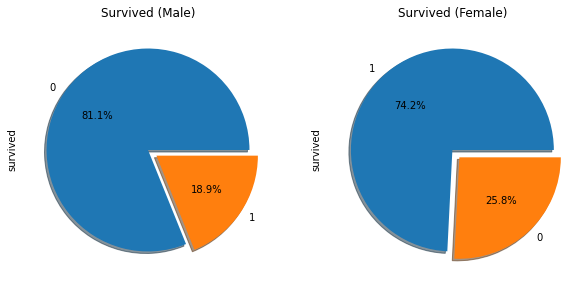

In [ ]:
 #차트를 그리기 위해 matplotlib.pyplot를 로드
import matplotlib.pyplot as plt
#남자 승객과 여자 승객의 생존율을 pie 차트로 그리기
 #한 줄에 두 개의 차트를 그리도록 하고 크기를 설정
f,ax = plt.subplots(1, 2, figsize = (10, 5))

 #첫 번째 pie 차트는 남자 승객의 생존율을 나타내도록 설정
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)       

 #두 번째 pie 차트는 여자 승객의 생존율을 나타내도록 설정
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)       

 #첫 번째 차트의 제목을 설정
ax[0].set_title('Survived (Male)')

 #두 번째 차트의 제목을 설정
ax[1].set_title('Survived (Female)')       

 #구성한 차트를 나타낸다.
plt.show()

#남자 승객의 생존율: 18.9% 
#여자 승객의 생존율 74.2%

#### 3.등급별 생존자 수를 차트로 나타내기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


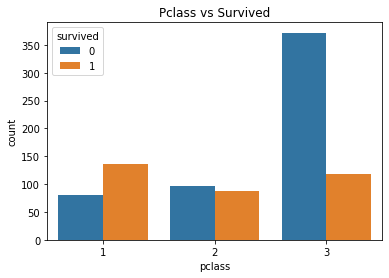

In [ ]:
 #pclass 유형 1,2,3을 x축으로 하고 survived =0과 survived =1의 개수를 계산하여 y축으로 하는 countplot을 설정
sns.countplot('pclass', hue = 'survived', data = titanic)

 #차트 제목을 설정
plt.title('Pclass vs Survived')

 #구성한 차트를 나타냄
plt.show()

#생존자(1)는 1등급에서 가장 많음
#사망자(0)는 3등급에서 월등히 많음

###[004] 데이터 모델링

*   타이타닉호 승객의 속성과 생존 사이에 어떤 상관관계가 있는지 분석하는 모델을 생성

*   상관 분석은 pandas 패키지의 데이터프레임에서 corr()함수를 사용하고, 상관 계수는 피어슨 상관 계수를 사용
*   상관 계수는 연속형 데이터에서만 구할 수 있으므로 데이터 형식이 int64, float64, boolean인 속성 8개에 대해서만 상관 분석을 진행




#### 1.상관 분석을 위한 상관 계수 구하고 저장하기

In [ ]:
#피어슨 상관 계수를 적용하여 상관 계수를 구함
titanic_corr = titanic.corr(method = 'pearson')

#상관 계수를 출력 
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [ ]:
#상관 계수를 CSV 파일로 저장 
titanic_corr.to_csv('titanic_corr.csv',index = False)

#### 2.상관 계수 확인하기

상관 계수 전체를 확인하려면 titanic_corr.csv 파일을 열어본다.
* 남자 성인(adult_male): 생존(survived)과 음의 상관관계
* 객실 등급(pclass): 음의 상관
* 관계, 객실 요금fare은 양의 상관관계
* 동행 없이 혼자 탑승한 경우(alone): 생존율이 떨어진다는 상관관계


#### 3.특정 변수 사이의 상관 계수 구하기

In [ ]:
#두 변수 사이의 상관 계수 구하기
 #survived와 adult_male 변수 사이의 상관 계수를 구함
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053257

In [ ]:
 #survived와 fare 변수 사이의 상관 계수를 구함
titanic['survived'].corr(titanic['fare'])

0.2573065223849625

###[005] 결과 시각화

#### 1.산점도로 상관 분석 시각화하기

ValueError: ignored

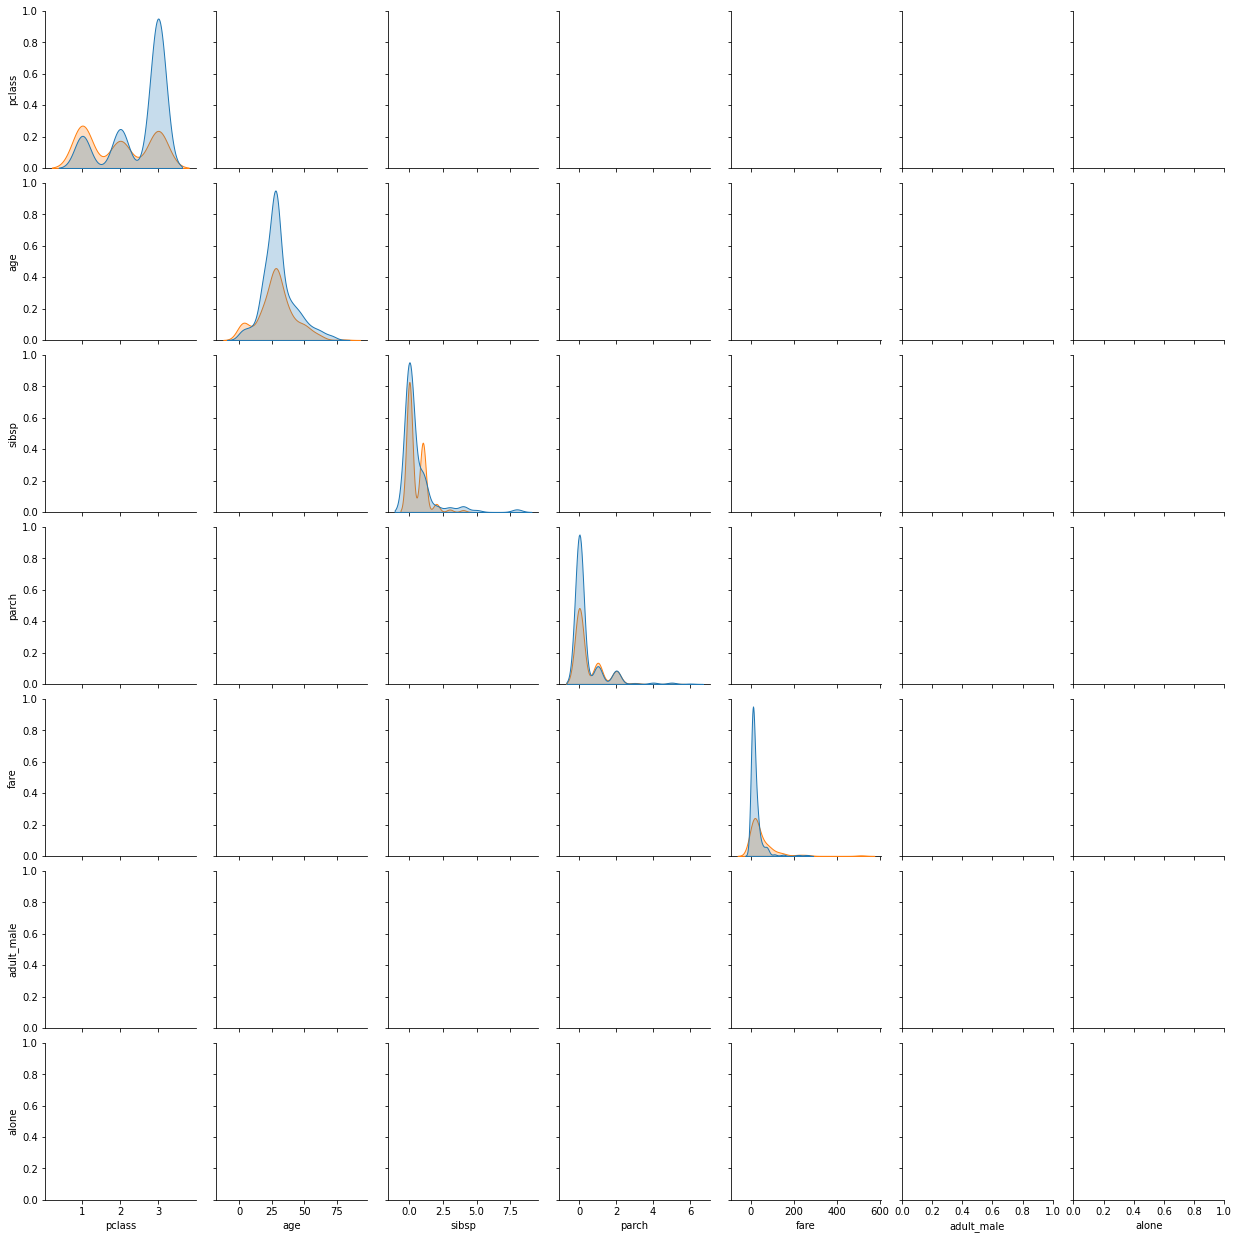

In [ ]:
#변수 간의 상관 분석 시각화를 위해 pairplot() 그리기
 #pairplot() 함수를 사용하여 타이타닉 데이터의 차트를 그림, hue는 종속 변수를 지정 
sns.pairplot(titanic, hue = 'survived')

#pairplot을 나타냄
plt.show()

* pclass, sibsp, parch, alone 변수에 대해 종속 변수 값을 나타내는 점이 퍼지지 않고 세로 또는 가로로 일정 지점에만 존재
* 이 변수들이 연속되는 실수형 값이 아니라 개수를 나타내는 정수형이거나 True/False를 나타내는 boolean형이기 때문

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,2
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True,2,1
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,1
888,0,3,0,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,2,4
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,2,1


#### 2.두 변수의 상관관계 시각화하기

In [ ]:
#생존자의 객실 등급과 성별 관계를 catplot()로 그리기
 #catplot() 함수를 사용하여 pclass와 survived 변수의 관계를 차트로 그림
 #hue인자를 이용하여 종속 변수를 sex로 지정
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')

 #catplot을 나타냄
plt.show()

#### 3.변수 사이의 상관 계수를 히트맵으로 시각화하기

* 변수 중 age를 히트맵에 나타내려면 카테고리 형식이어야 하므로 10살 단위로 0부터 7까지 카테고리 값을 치환
* 상관 계수를 계산하려면 숫자 데이터이어야 하므로 sex 변수값을 0과 1로 치환
*우리가 가지고 있는 데이터에는 동행한 형제의 수(sibsp)와 부모/.자식의 수(parch)가 있는데 이를 더해서 가족의 수를 새로운 변수 family로 추가해보자.

In [ ]:
#age를 카테고리 값으로 바꾸어 age2 변수로 추가하기
 #10살 단위로 등급을 나누어 0~7의 값으로 바꿔주는 category_age 함수를 작성
def category_age(x):
        if x < 10:
           return 0
        elif x < 20:
           return 1
        elif x < 30:
           return 2
        elif x < 40:
           return 3
        elif x < 50:
            return 4
        elif x < 60:
           return 5
        elif x < 70:
           return 6
        else:
           return 7

 #category_age 함수를 적용하여 새로운 age2 열을 만들어 추가
titanic['age2'] = titanic['age'].apply(category_age)

 #성별을 male/female에서 1/0으로 치환
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})

 #가족의 수를 구하여 family 열을 추가
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

 #수정된 데이터프레임을 titanic3.csv로 저장
titanic.to_csv('titanic3.csv', index = False)


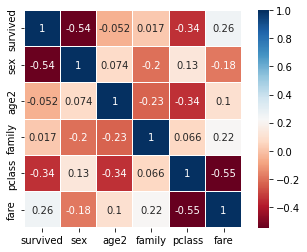

In [ ]:
#상관 분석 결과를 히트맵으로 나타내기
 #히트맵에 사용할 데이터를 추출
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass','fare']]

 #히트맵에 사용할 색상맵을 지정
colormap = plt.cm.RdBu
 
 #corr() 함수로 구한 상관 계수로 히트맵을 생성 
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws = {"size": 10})
 
 #생성한 히트맵을 나타냄
plt.show()

##[12주] 문서 제목의 키워드 분석

■ 목표설정
> 목표: ‘Big data’와 관련된 키워드를 도출하여 분석

■ 핵심 개념 이해
> ① 영문 데이터에서 분석할 특징을 선정

> ② 컴퓨터가 처리할 수 있는 벡터 형태로 변환

> ③ 분석 기법을 적용하여 필요한 정보를 추출


###[001] 데이터 수집

###[002] 데이터 준비

#### 1.패키지 설치하기

In [ ]:
#matplotlib와 wordcloud를 설치
!pip install matplotlib 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install wordcloud 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### 2.프로젝트에 필요한 파이썬 패키지를 임포트

In [ ]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [ ]:
#NLTK(자연어 처리 패키지) 패키지 설치

#!pip install nltk
import nltk
#nltk.download("omw-1.4")
#nltk.download('treebank')
#nltk.download('gutenberg')
nltk.download('all')
#nltk.download('all-nltk')
from nltk.book import *

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


#### 3.데이터 조합 - 파일 병합하기

In [ ]:
#병합할 엑셀 파일 이름 10개를 리스트에 저장
#10개의 엑셀 파일 이름을 all_files 리스트에 저장
all_files = glob.glob('riss_data/myCabinetExcelData*.xlsx')
all_files #출력하여 내용 확인

['riss_data/myCabinetExcelData (5).xlsx',
 'riss_data/myCabinetExcelData (6).xlsx',
 'riss_data/myCabinetExcelData.xlsx',
 'riss_data/myCabinetExcelData (4).xlsx',
 'riss_data/myCabinetExcelData (1).xlsx',
 'riss_data/myCabinetExcelData (8).xlsx',
 'riss_data/myCabinetExcelData (7).xlsx',
 'riss_data/myCabinetExcelData (3).xlsx',
 'riss_data/myCabinetExcelData (2).xlsx',
 'riss_data/myCabinetExcelData (9).xlsx']

xls 파일 로드 오류 발생시 xlsx 파일로 변환 후 진행

In [ ]:
#파일을 읽어서 하나의 데이터프레임으로 병합하고 CSV 파일에 저장

 #저장할 리스트 
all_files_data = [] 

 #pd.read_excel( ) : all_files 리스트에 있는 파일 이름을 이용해 엑셀 파일을 읽어옴
 #append( ) : 파일 내용을 all_files_data에 추가
 #all_files 리스트의 원소 갯수만큼, 즉 10개 파일에 대해 반복
for file in all_files:  
    data_frame = pd.read_excel(file)    
    all_files_data.append(data_frame) 

 #작업 내용 확인 
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Randomized Block Proximal Methods for Distribu...,"Farina, Francesco; Notarstefano, Giuseppe",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2021
1,NaN,2,Physical education's grand convergence: Fitnes...,"Pluim, Carolyn; Gard, Michael",Taylor & Francis,2018
2,NaN,3,Identifying industrial clusters with a novel b...,"Papagiannidis, Savvas; See-To, Eric W.K.; Assi...","Elsevier Science B.V., Amsterdam.",2018
3,NaN,4,Evolutionary Scheduling of Dynamic Multitaskin...,"Zhang, F.; Cao, J.; Tan, W.; Khan, S. U.; Li, ...",IEEE,2014
4,NaN,5,A code offloading scheme for big-data processi...,"Hung, S. H.; Tzeng, T. T.; Wu, G. D.; Shieh, J...","John Wiley & Sons, Ltd",2015
...,...,...,...,...,...,...
95,NaN,96,"Big Data, Little Data, No Data: Scholarship in...","Fu, Tao",Taylor & Francis,2017
96,NaN,97,"Big Data, Little Data, No Data: Scholarship in...","Lemieux, Thomas Mayer",CANADIAN JOURNAL OF COMMUNICATION CORPORATION,2017
97,NaN,98,Big Data and Risk Management The financial ser...,unknown,RISK MANAGEMENT SOC PUBLISHING INC,2012
98,NaN,99,Big Data: Friend or Foe of Digital Advertising...,"Fulgoni, G.",World Advertising Research Center,2013


In [ ]:
#all_files_data를 세로축을 기준(axis=0)으로 병합하여 all_files_data_concat 리스트 에 저장
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

all_files_data_concat #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Randomized Block Proximal Methods for Distribu...,"Farina, Francesco; Notarstefano, Giuseppe",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2021
1,NaN,2,Physical education's grand convergence: Fitnes...,"Pluim, Carolyn; Gard, Michael",Taylor & Francis,2018
2,NaN,3,Identifying industrial clusters with a novel b...,"Papagiannidis, Savvas; See-To, Eric W.K.; Assi...","Elsevier Science B.V., Amsterdam.",2018
3,NaN,4,Evolutionary Scheduling of Dynamic Multitaskin...,"Zhang, F.; Cao, J.; Tan, W.; Khan, S. U.; Li, ...",IEEE,2014
4,NaN,5,A code offloading scheme for big-data processi...,"Hung, S. H.; Tzeng, T. T.; Wu, G. D.; Shieh, J...","John Wiley & Sons, Ltd",2015
...,...,...,...,...,...,...
995,NaN,96,A Big Data-Driven Model for the Optimization o...,"Koufi, Vassiliki; Malamateniou, Flora; Vassi...",IOS Press,2015
996,NaN,97,Coastal 'Big Data' and nature-inspired computa...,"Millie, D. F.; Weckman, G. R.; Young, W. A.; I...","Elsevier Science B.V., Amsterdam",2013
997,NaN,98,Mining Big Data: A Philologist's Perspective,"Rütten, Tanja",CRIST-JAN DOEDENS,2019
998,NaN,99,Thinking Big Large publishers are beginning to...,unknown,PRIMEDIA,2014


In [ ]:
#to_csv() : all_files_data_concat을 CSV 파일로 저장
all_files_data_concat.to_csv('riss_data/riss_bigdata.csv', encoding='utf-8', index = False)

#### 4.데이터 전처리

In [ ]:
# 제목 추출
#all_files_data_concat의 컬럼 중에서 분석에 사용할 ‘제목’ 컬럼만 추출해 all_title 에 저장
all_title = all_files_data_concat['제목']

all_title #출력하여 내용 확인

0      Randomized Block Proximal Methods for Distribu...
1      Physical education's grand convergence: Fitnes...
2      Identifying industrial clusters with a novel b...
3      Evolutionary Scheduling of Dynamic Multitaskin...
4      A code offloading scheme for big-data processi...
                             ...                        
995    A Big Data-Driven Model for the Optimization o...
996    Coastal 'Big Data' and nature-inspired computa...
997         Mining Big Data: A Philologist's Perspective
998    Thinking Big Large publishers are beginning to...
999    Bridging "Big Data" and Mechanistic Insight To...
Name: 제목, Length: 1000, dtype: object

In [ ]:
#전처리 작업을 위해 nltk.corpus에서 제공하는 영어 불용어 stopwords.words("english")를 불러와서 저장
stopWords = set(stopwords.words("english"))

#표제어 추출 작업을 제공하는 WordNetLemmatizer 객체를 생성
lemma = WordNetLemmatizer()

In [ ]:
#all_title의 제목에 대해 정규식으로 만든 규칙을 적용하여 알파벳 으로 시작하지 않는 단어"[^a-zA-Z]+"는 공백으로 치환(re.sub( ))하여 제거
#소문자로 정규화(lower( ))
#단어 토큰화(word_tokenize( ))를 함 
#불용어(stopWords)를 제거
#표제어 추출(lemmatize(w))을 함

words = []  

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))    
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [ ]:
#출력하여 내용 확인
print(words)  

[['randomized', 'block', 'proximal', 'method', 'distributed', 'stochastic', 'big', 'data', 'optimization'], ['physical', 'education', 'grand', 'convergence', 'fitnessgram', 'big', 'data', 'digital', 'commerce', 'child', 'health'], ['identifying', 'industrial', 'cluster', 'novel', 'big', 'data', 'methodology', 'sic', 'code', 'fit', 'purpose', 'internet', 'age'], ['evolutionary', 'scheduling', 'dynamic', 'multitasking', 'workload', 'big', 'data', 'analytics', 'elastic', 'cloud'], ['code', 'offloading', 'scheme', 'big', 'data', 'processing', 'android', 'application'], ['economics', 'econophysics', 'era', 'big', 'data'], ['high', 'performance', 'interconnection', 'network', 'exascale', 'big', 'data', 'era'], ['stochastic', 'approximation', 'statistical', 'origin', 'big', 'data', 'multidisciplinary', 'application'], ['proxy', 'expenditure', 'weight', 'consumer', 'price', 'index', 'audit', 'sampling', 'inference', 'big', 'data', 'statistic'], ['aspirin', 'heart', 'disease', 'form', 'focus', 

In [ ]:
#전처리가 끝난 words는 2차원 리스트이므로 reduce() 함수를 사용하여 1차원 리스트로 변환
words2 = list(reduce(lambda x, y: x+y,words))

#작업 내용 확인
print(words2)  

['randomized', 'block', 'proximal', 'method', 'distributed', 'stochastic', 'big', 'data', 'optimization', 'physical', 'education', 'grand', 'convergence', 'fitnessgram', 'big', 'data', 'digital', 'commerce', 'child', 'health', 'identifying', 'industrial', 'cluster', 'novel', 'big', 'data', 'methodology', 'sic', 'code', 'fit', 'purpose', 'internet', 'age', 'evolutionary', 'scheduling', 'dynamic', 'multitasking', 'workload', 'big', 'data', 'analytics', 'elastic', 'cloud', 'code', 'offloading', 'scheme', 'big', 'data', 'processing', 'android', 'application', 'economics', 'econophysics', 'era', 'big', 'data', 'high', 'performance', 'interconnection', 'network', 'exascale', 'big', 'data', 'era', 'stochastic', 'approximation', 'statistical', 'origin', 'big', 'data', 'multidisciplinary', 'application', 'proxy', 'expenditure', 'weight', 'consumer', 'price', 'index', 'audit', 'sampling', 'inference', 'big', 'data', 'statistic', 'aspirin', 'heart', 'disease', 'form', 'focus', 'u', 'big', 'data',

###[003] 데이터 탐색 및 분석 모델 구축

#### 1.데이터 탐색 - 단어 빈도 구하기

In [ ]:
#words2 리스트에 있는 단어별로 출현 횟수를 계산하여 딕셔너리 객체인 count를 생성(Counter( ))
count = Counter(words2)

#출력하여 내용 확인
count   

Counter({'randomized': 3,
         'block': 1,
         'proximal': 1,
         'method': 21,
         'distributed': 19,
         'stochastic': 4,
         'big': 1116,
         'data': 1235,
         'optimization': 22,
         'physical': 4,
         'education': 8,
         'grand': 2,
         'convergence': 2,
         'fitnessgram': 1,
         'digital': 15,
         'commerce': 3,
         'child': 3,
         'health': 31,
         'identifying': 2,
         'industrial': 8,
         'cluster': 5,
         'novel': 8,
         'methodology': 4,
         'sic': 1,
         'code': 3,
         'fit': 1,
         'purpose': 2,
         'internet': 18,
         'age': 4,
         'evolutionary': 1,
         'scheduling': 10,
         'dynamic': 6,
         'multitasking': 1,
         'workload': 2,
         'analytics': 107,
         'elastic': 1,
         'cloud': 30,
         'offloading': 1,
         'scheme': 6,
         'processing': 26,
         'android': 1,
         'app

In [ ]:
#출현 횟수가 많은 상위 50개 단어(count.most_common(50)) 중에서 단어 길이가 1보다 큰 것만 word_count 딕셔너리에 저장한 후 출력

word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1235
big : 1116
analytics : 107
based : 95
analysis : 85
driven : 62
using : 57
system : 54
approach : 53
model : 49
issue : 48
challenge : 47
learning : 44
application : 43
new : 43
special : 37
science : 34
management : 33
framework : 33
health : 31
platform : 31
research : 31
call : 31
cloud : 30
era : 29
algorithm : 29
opportunity : 29
paper : 29
smart : 27
processing : 26
network : 26
computing : 25
machine : 24
technology : 24
review : 24
earth : 24
process : 23
information : 23
mining : 23
use : 23
perspective : 23
optimization : 22
business : 22
method : 21
service : 21
intelligence : 21
social : 21
performance : 20
real : 20
energy : 20


여기서 잠깐!! : 검색어로 사용한 big'과 'data' 빈도가 압도적으로 많으므로, 이를 제거한다.

In [ ]:
#검색어로 사용한 'big'과 'data' 항목 제거 하기
del word_count['big']
del word_count['data']

#### 2.데이터 탐색 - 히스토그램 그리기

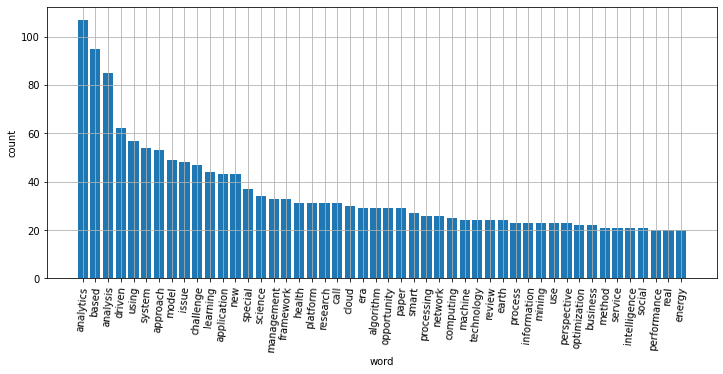

In [ ]:
# 히스토그램 표시 옵션 
#히스토그램을 그리기 위해 matplotlib.pyplot을 사용
#히스토그램의 크기figure( )를 지정
#x축 레이블xlabel( )과 y축 레이블ylabel( )을 지정
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

#상위 50개만 저장한 word_count 딕셔너리에서 x축 값으로 사용할 sorted_Keys와 y축 값으로 사용할 sorted_Values를 역순으로 정렬하여(reverse=True) 준비
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')

#x축 눈금(plt.xticks)은 sorted_Keys 리스트의 값(상위 50개 단어)을 순서대로 사용
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')

#설정 사항을 적용하여 히스토그램을 그림(plt.show( ))
plt.show()

###[004] 결과 시각화

#### 1.그래프 그리기

In [ ]:
#all_files_data_concat에 doc_count 컬럼을 추가한 뒤 ‘출판일’ 컬럼을 기준 으로 그룹을 만들고(groupby( ))
#그룹별 데이터 개수(count( ))를 doc_count 컬럼에 저장하여 summary_year 리스트를 생성

all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()

#출력하여 내용 확인
summary_year  

,출판일,doc_count
0,1995,1
1,2003,1
2,2004,1
3,2006,1
4,2008,1
5,2009,1
6,2011,7
7,2012,20
8,2013,59
9,2014,136


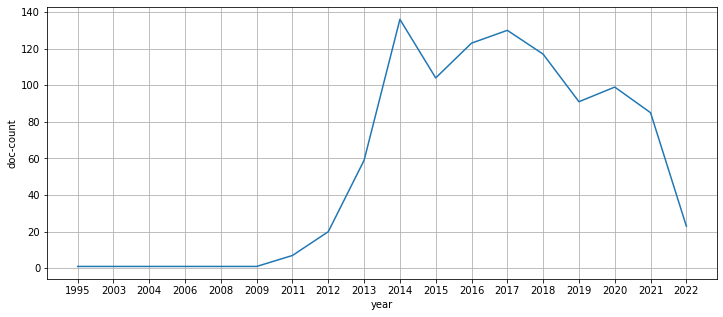

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)

#summary_year의 doc_count 컬럼을 차트의 y축으로 설정하고(plt.plot( )), ‘출판일’ 컬럼은 x축으로 설정하여(plt.xticks( )) 차트를 그림
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])

plt.show()

#### 2.워드클라우드 그리기

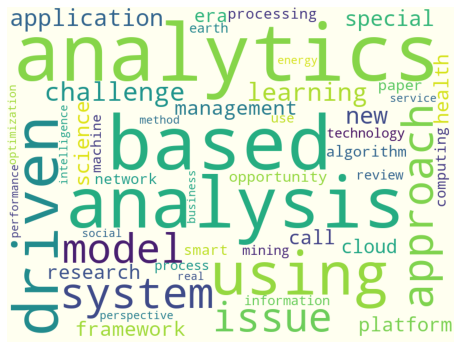

In [ ]:
#워드클라우드에서 처리할 불용어를 설정하고(set(STOPWORDS))
stopwords=set(STOPWORDS)

#워드클라우드 객체를 생성(WordCloud( ))
wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)

#워드클라우드 객체인 wc에 word_count 데이터를 담아서(wc.generate_ from_frequencies( )) cloud 객체를 생성
cloud=wc.generate_from_frequencies(word_count)

#생성한 워드클라우드는 matplotlib.pyplot을 사용하여 나타냄
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

워드 클라우드에 나타나는 단어의 위치는 실행 할 때마다 달라진다.

In [ ]:
#워드클라우드를 jpg 파일로 저장(to_file( ))
cloud.to_file("riss_data/riss_bigdata_wordCloud.jpg")

## [13주] 항목에 따른 자동차 연비 예측

### [001] 데이터 수집

In [ ]:
import numpy as np
import pandas as pd 

data_df = pd.read_csv('auto-mpg.csv', header=0, engine='python')

### [002] 데이터 준비 및 탐색

In [ ]:
print(' 데이터셋 크기 : ', data_df.shape)

data_df.head()

 데이터셋 크기 :  (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### 1.분석하지 않은 변수 제외하기

In [ ]:
data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis=1, inplace=False)

In [ ]:
print(' 데이터세트 크기 : ', data_df.shape)

data_df.head()

 데이터세트 크기 :  (398, 6)


,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


### [003] 분석 모델 구축

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# X, Y 분할하기

Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)

In [ ]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [ ]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)
print(Y_predict)

[12.68813886 24.89235692 11.77966226 20.713484   17.59974974 28.70463932
 31.8246109  24.79459783 13.3797074  28.03809202 33.95480562 32.517138
 21.28643713 26.32547953 16.29305741 32.16905355 30.04731897 29.90617451
 17.78110613 30.69577551 15.33574367 25.60299563 25.4723533  20.04730443
 30.70244174 26.79576507 32.20306918 31.95533215 30.42830733 18.19432511
 21.19981862 29.62938625 20.86352443 30.82503708 24.35511863 23.81034331
 21.45816755 16.77101118 31.95362794  8.06590693  9.60178767 13.8699291
 27.26165312 29.00102026 29.52364892 22.58571769 23.20233694 13.80533693
 23.86039376 28.12535283 31.40954528 26.70297991 15.34381889 25.01897062
 14.71481708  9.53883961 19.64272577 26.82491432 31.30917854 14.99268593
 20.64360774 25.57610711 22.45200894 19.72033566 10.7918702  11.42513414
  9.7023088  19.68724093 24.98227534  9.68717343 33.31781779 10.21150582
 20.84069925 19.27272978 22.433523   29.31460799 28.98886268 28.57314167
 29.70646598 16.24391797 12.49894224 27.56814445 31.31

### [004] 결과 시각화

In [ ]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 12.278, RMSE : 3.504
R^2(Variance score) : 0.808


In [ ]:
print('Y 절편 값: ',  np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  -17.55
회귀 계수 값:  [-0.14  0.01 -0.01  0.2   0.76]


In [ ]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending=False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

#### 1.회귀분석 결과를 산점도+선형 회귀 그래프로 시각화하기

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

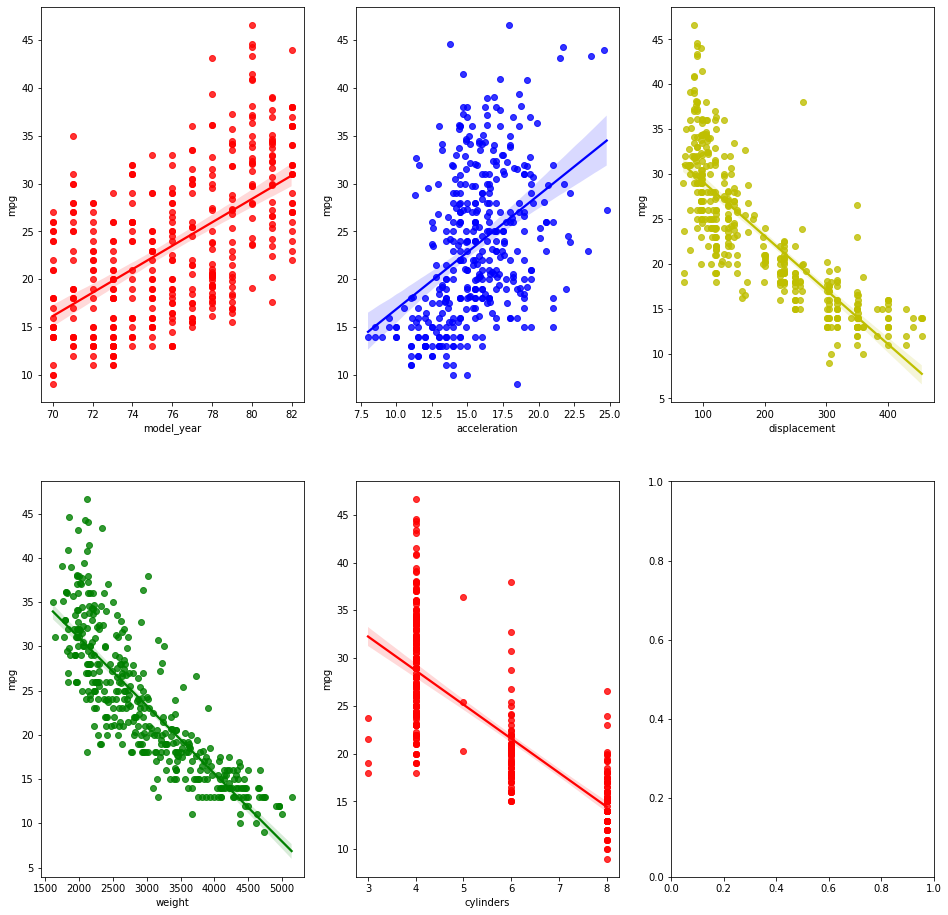

In [ ]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)

x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']

for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

#### 2.연비 예측하기

In [ ]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")

cylinders_1 = int(input("cylinders : "))
displacement_1 = int(input("displacement : "))
weight_1 = int(input("weight : "))
acceleration_1 = int(input("acceleration : "))
model_year_1 = int(input("model_year : "))

연비를 예측하고 싶은 차의 정보를 입력해주세요.
cylinders : 8
displacement : 350
weight : 3200
acceleration : 2
model_year : 99


In [ ]:
mpg_predict = lr.predict([[cylinders_1, displacement_1, weight_1, acceleration_1 , model_year_1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print("이 자동차의 예상 연비(mpg)는 %.2f 입니다." %mpg_predict)

이 자동차의 예상 연비(mpg)는 37.36 입니다.


In [ ]:
a = mpg_predict[0]*0.425

print("이 자동차의 예상 연비(Km/L)는 %.2f 입니다." %a)

이 자동차의 예상 연비(Km/L)는 15.88 입니다.


## [14주] 특징 데이터로 유방암 진단

### [001] 데이터 수집

In [1]:
# 사이킷런에서 제공하는 데이터셋(sklearn.datasets)중에서 유방암 진단 데이터셋을 사용하기 위해 load_breast_cancer를 임포트
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

In [2]:
# 데이터셋을 로드하여 객체(b_cancer)를 생성
b_cancer = load_breast_cancer()

### [002] 데이터 준비 및 탐색

In [3]:
# 데이터셋에 대한 설명을 확인
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
# 데이터셋 객체의 data 배열(b_cancer.data), 즉 독립 변수 X가 되는 피처를 DataFrame 자료형으로 변환하여 b_cancer_df를 생성
b_cancer_df = pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)

# 유방암 유무 class로 사용할 diagnosis 컬럼을 b_cancer_df에 추가하고 데이터셋 객체의 target 컬럼(b_cancer.target)을 저장
b_cancer_df['diagnosis']= b_cancer.target

# b_cancer_df의 데이터 샘플 5개를 출력(b_cancer_df.head())하여 확인
b_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
# b_cancer_df.shape를 사용하여 데이터셋의 행의 개수(데이터 샘플 개수)와 열의 개수(변수 개수)를 확인
# 행의 개수가 569이므로 데이터 샘플이 569개, 열의 개수가 31이므로 변수가 31개 있음
print('유방암 진단 데이터셋 크기 : ', b_cancer_df.shape)

유방암 진단 데이터셋 크기 :  (569, 31)


In [7]:
#  b_cancer_df에 대한 정보를 확인(b_cancer_df.info())
# 30개의 피처(독립 변수 X)  이름과 1개의 종속 변수 이름을 확인 가능
# diagnosis는 악성이면 1, 양성이면 0의 값이므로 유방암 여부에 대한 이진 분류의 class로 사용할 종속 변수가 됨
b_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
# 사이킷런의 전처리 패키지에 있는 정규 분포 스케일러를 임포트하고 사용할 객체scaler를 생성
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 피처로 사용할 데이터(b_cancer.data)에 대해 정규 분포 스케일링을 수행(scaler.fit_ transform())하여 b_cancer_scaled에 저장
b_cancer_scaled = scaler.fit_transform(b_cancer.data)

In [39]:
# 정규 분포 스케일링 후에 값이 조정된 것을 확인
print(b_cancer.data[0])

print("평균:",np.mean(b_cancer.data[0]))
print("분산:",np.var(b_cancer.data[0]))

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
평균: 118.87261573333332
분산: 157619.42635300482


In [40]:
# 정규 분포 스케일링 후에 값이 조정된 것을 확인
print(b_cancer_scaled[0])

print("평균:",np.mean(b_cancer_scaled[0]))
print("분산:",np.var(b_cancer_scaled[0]))

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]
평균: 1.514235920028231
분산: 1.5308879001944076


### [003] 분석 모델 구축:로지스틱 회귀를 이용한 이진 분류 모델

In [46]:
# 필요한 모듈을 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [47]:
# X, Y 설정하기
 # diagnosis를 Y, 정규 분포로 스케일링한 b_cancer_scaled를 X로 설정
Y = b_cancer_df['diagnosis']
X = b_cancer_scaled 

# 훈련용 데이터와 평가용 데이터 분할하기
 # 전체 데이터 샘플 569개를 학습 데이터:평가 데이터=7:3으로 분할test_size=0.3함
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# 로지스틱 회귀 분석 : (1)모델 생성
 # 로지스틱 회귀 분석 모델 객체(lr_b_cancer)를 생성
lr_b_cancer = LogisticRegression()

# 로지스틱 회귀 분석 : (2)모델 훈련
 # 학습 데이터X_train, Y_train로 모델 학습을 수행(fit())함
lr_b_cancer.fit(X_train, Y_train)

# 로지스틱 회귀 분석 : (3)평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
 # 학습이 끝난 모델에 대해 평가 데이터 XX_test를 가지고 예측을 수행(predict())하여 예측값 Y_predict를 구함
Y_predict = lr_b_cancer.predict(X_test)

### [004] 결과 분석

In [48]:
# 필요한 모듈을 임포트
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [53]:
# 오차 행렬 
 # 평가를 위해 7:3으로 분할한 171개의 test 데이터에 대해 이진 분류의 성능 평가 기본이 되는 오차 행렬을 구함 
confusion_matrix(Y_test, Y_predict)
 # 실행 결과를 보면 TN이 60개, FP가 3개, FN이 1개, TP가 107개인 오차 행렬이 구해짐

array([[ 60,   3],
       [  1, 107]])

In [54]:
# 성능 평가 지표인 정확도, 정밀도, 재현율, F1 스코어를 구함
acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)

print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

정확도: 0.977, 정밀도: 0.973, 재현율: 0.991,  F1: 0.982


In [55]:
# ROC-AUC 스코어를 구함
print('ROC_AUC: {0:.3f}'.format(roc_auc))

ROC_AUC: 0.972


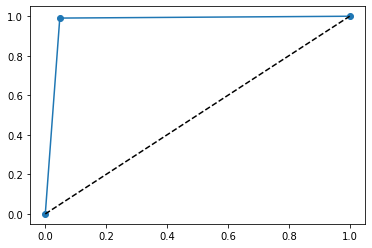

In [71]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.show()

## [참고-1] 지리 정보 분석

### [001] 데이터 수집

### [002] 데이터 준비 및 탐색


#### 1.행정구역 주소 체계 데이터 준비하기

#### 2.분석할 커피 매장의 주소 데이터 준비하기

In [ ]:
# 커피빈 매장 데이터 확인
import pandas as pd

CB = pd.read_csv('CoffeeBean.csv', encoding='CP949', index_col=0, header=0, engine='python')

CB.head()  #작업 내용 확인용 출력

,store,address,phone
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973
1,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326
2,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615
3,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778
4,메가박스점,서울 강남구 삼성동 159 코엑스몰 지하2층,02-6002-3320


In [ ]:
# 주소 데이터를 행정구역 주소 체계에 맞게 정리하기
addr = []

for address in CB.address:
    addr.append(str(address).split())

#작업 내용 확인용 출력
print('데이터 개수 : %d' % len(addr)) 
addr  

데이터 개수 : 243


[['서울시', '강남구', '학동로', '211', '1층'],
 ['서울시', '강남구', '광평로', '280', '수서동', '724호'],
 ['서울시', '강남구', '논현로', '566', '강남차병원1층'],
 ['서울시', '서초구', '강남대로', '369', '1층'],
 ['서울', '강남구', '삼성동', '159', '코엑스몰', '지하2층'],
 ['서울시', '강남구', '압구정로', '46길', '3'],
 ['서울시', '서초구', '서초', '1306-3호'],
 ['서울시', '강남구', '압구정로', '461', '네이처포엠빌딩B108,109호'],
 ['서울시', '강남구', '도산대로', '126'],
 ['서울시', '강남구', '논현로', '842', '압구정빌딩1층'],
 ['서울시', '강남구', '논현로', '512', '지상1,2층'],
 ['서울시', '서초구', '강남대로', '213', '24호', '지하1층'],
 ['서울시', '강남구', '삼성로', '716', 'LEE76빌딩2층'],
 ['서울', '서초구', '반포동', '736-17', 'P빌딩', '2층'],
 ['서울시', '강남구', '언주로', '30길', '10,112', '현대비젼21', '112호'],
 ['서울시', '강남구', '선릉로', '749', '1,2층'],
 ['서울시', '강남구', '테헤란로', '87길', '17', '1층'],
 ['서울시', '서초구', '서초중앙로', '118', '1층'],
 ['서울시', '강남구', '선릉로', '64길', '23', '1층'],
 ['서울시', '강남구', '도산대로49길', '13', '1층', '17,18호'],
 ['서울시', '강남구', '선릉로', '157길', '12', '석전빌딩', '1~4층'],
 ['서울시', '서초구', '강남대로', '51길', '1', '511', 'TOWER', '1층'],
 ['서울시', '강남구', '논현', '231-13

In [ ]:
#-addr에서 행정구역 표준 이름이 아닌 것 수정하기
addr2 = []

# addr에서 행정구역 표준 이름이 아닌것 수정하기
for i in range(len(addr)):
    if addr[i][0] == "서울": addr[i][0]="서울특별시"
    elif addr[i][0] == "서울시": addr[i][0]="서울특별시"
    elif addr[i][0] == "부산시": addr[i][0]="부산광역시"
    elif addr[i][0] == "인천": addr[i][0]="인천광역시"
    elif addr[i][0] == "광주": addr[i][0]="광주광역시"
    elif addr[i][0] == "대전시": addr[i][0]="대전광역시"
    elif addr[i][0] == "울산시": addr[i][0]="울산광역시"    
    elif addr[i][0] == "세종시": addr[i][0]="세종특별자치시"
    elif addr[i][0] == "경기": addr[i][0]="경기도"
    elif addr[i][0] == "충북": addr[i][0]="충청북도"
    elif addr[i][0] == "충남": addr[i][0]="충청남도"
    elif addr[i][0] == "전북": addr[i][0]="전라북도"
    elif addr[i][0] == "전남": addr[i][0]="전라남도"
    elif addr[i][0] == "경북": addr[i][0]="경상북도"
    elif addr[i][0] == "경남": addr[i][0]="경상남도"
    elif addr[i][0] == "제주": addr[i][0]="제주특별자치도"
    elif addr[i][0] == "제주도": addr[i][0]="제주특별자치도"
    elif addr[i][0] == "제주시": addr[i][0]="제주특별자치도"                                
       
    addr2.append(' '.join(addr[i]))  

addr2 #작업 내용 확인용 출력

['서울특별시 강남구 학동로 211 1층',
 '서울특별시 강남구 광평로 280 수서동 724호',
 '서울특별시 강남구 논현로 566 강남차병원1층',
 '서울특별시 서초구 강남대로 369 1층',
 '서울특별시 강남구 삼성동 159 코엑스몰 지하2층',
 '서울특별시 강남구 압구정로 46길 3',
 '서울특별시 서초구 서초 1306-3호',
 '서울특별시 강남구 압구정로 461 네이처포엠빌딩B108,109호',
 '서울특별시 강남구 도산대로 126',
 '서울특별시 강남구 논현로 842 압구정빌딩1층',
 '서울특별시 강남구 논현로 512 지상1,2층',
 '서울특별시 서초구 강남대로 213 24호 지하1층',
 '서울특별시 강남구 삼성로 716 LEE76빌딩2층',
 '서울특별시 서초구 반포동 736-17 P빌딩 2층',
 '서울특별시 강남구 언주로 30길 10,112 현대비젼21 112호',
 '서울특별시 강남구 선릉로 749 1,2층',
 '서울특별시 강남구 테헤란로 87길 17 1층',
 '서울특별시 서초구 서초중앙로 118 1층',
 '서울특별시 강남구 선릉로 64길 23 1층',
 '서울특별시 강남구 도산대로49길 13 1층 17,18호',
 '서울특별시 강남구 선릉로 157길 12 석전빌딩 1~4층',
 '서울특별시 서초구 강남대로 51길 1 511 TOWER 1층',
 '서울특별시 강남구 논현 231-13호 팍스타워지하1층',
 '서울특별시 강남구 영동대로 513 컨벤션별관A동 지하 2층',
 '서울특별시 강남구 영동대로 511 트레이드타워 지하1층',
 '서울특별시 강남구 영동대로 607 12번지 1,2층',
 '서울특별시 강남구 삼성로 85길 11 롯데캐슬아파트생활편익시설동',
 '서울특별시 서초구 신반포로 23 1141호 엘루체백화점내1층1013~1015호',
 '서울특별시 송파구 석촌호수로 118 1층',
 '서울특별시 서초구 서초동 1685-8호 101~2호,113~4호,121호',
 '서울특별시 강남구 논현로 717 1층',
 '서

In [ ]:
addr2 = pd.DataFrame(addr2, columns=['address2'])

addr2 #작업 내용 확인용 출력

,address2
0,서울특별시 강남구 학동로 211 1층
1,서울특별시 강남구 광평로 280 수서동 724호
2,서울특별시 강남구 논현로 566 강남차병원1층
3,서울특별시 서초구 강남대로 369 1층
4,서울특별시 강남구 삼성동 159 코엑스몰 지하2층
...,...
238,인천광역시 중구 운서동 2868 인천공항 제2터미널 1층 연번(23-124)
239,"부산광역시 부산진구 서전로 12, 1층"
240,경기도 성남시 분당구 야탑로64 DS타워 1층
241,서울특별시 용산구 한강대로95


In [ ]:
CB2 = pd.concat([CB, addr2],  axis=1 )

CB2.head()  #작업 내용 확인용 출력

,store,address,phone,address2
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973,서울특별시 강남구 학동로 211 1층
1,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326,서울특별시 강남구 광평로 280 수서동 724호
2,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615,서울특별시 강남구 논현로 566 강남차병원1층
3,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778,서울특별시 서초구 강남대로 369 1층
4,메가박스점,서울 강남구 삼성동 159 코엑스몰 지하2층,02-6002-3320,서울특별시 강남구 삼성동 159 코엑스몰 지하2층


In [ ]:
CB2.to_csv('CoffeeBean_2.csv',encoding='CP949', index = False)

### [003] 분석 모델 구축 및 시각화

#### 1.지도 객체 생성하기

In [ ]:
#지도 정보 시각화 라이브러리 설치 및 임포트하기
!pip install folium
import folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#숭례문 좌표를 사용하여 지도 객체 테스트하기
map_osm = folium.Map(location=[37.560284, 126.975334], zoom_start = 16)
map_osm.save('map.html')

In [ ]:
#정리해둔 CoffeeBean_2.csv 파일 로드
CB_file = pd.read_csv('CoffeeBean_2.csv',encoding='cp949',  engine='python')

CB_file.head() #작업 내용 확인용 출력

,store,address,phone,address2
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973,서울특별시 강남구 학동로 211 1층
1,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326,서울특별시 강남구 광평로 280 수서동 724호
2,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615,서울특별시 강남구 논현로 566 강남차병원1층
3,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778,서울특별시 서초구 강남대로 369 1층
4,메가박스점,서울 강남구 삼성동 159 코엑스몰 지하2층,02-6002-3320,서울특별시 강남구 삼성동 159 코엑스몰 지하2층


#### 2.지도 객체에 커피 매장 위치 표시하기

In [ ]:
#오픈 소프트웨어 Geocoder-Xr을 사용하여 구한 GPS 좌표 파일 로드

CB_geoData = pd.read_csv('CB_geo.shp_2.csv',encoding='cp949',  engine='python')

len(CB_geoData) #확인용 출력

243

In [ ]:
map_CB = folium.Map(location=[37.560284, 126.975334], zoom_start = 15)

for i, store in CB_geoData.iterrows():   
    folium.Marker(location=[store['위도'], store['경도']], popup= store['store'], icon=folium.Icon(color='red', icon='star')).add_to(map_CB)

map_CB.save('map_CB.html')

In [ ]:
import webbrowser

webbrowser.open('map_CB.html')

False

## [참고-2] 타깃 마케팅을 위한 소비자 군집 분석

### [001] 데이터 수집

In [ ]:
import pandas as pd
import math

In [ ]:
retail_df = pd.read_excel('Online Retail.xlsx')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### [002] 데이터 준비 및 탐색

In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# 오류 데이터 정제
retail_df = retail_df[retail_df['Quantity'] > 0] 
retail_df = retail_df[retail_df['UnitPrice'] > 0] 
retail_df = retail_df[retail_df['CustomerID'].notnull()] 

# 'CustomerID' 자료형을 정수형으로 변환
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
retail_df.info()
print(retail_df.isnull().sum())
print(retail_df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
(397884, 8)


In [ ]:
# 중복 레코드 제거
retail_df.drop_duplicates(inplace=True)

print(retail_df.shape) #작업 확인용 출력

(392692, 8)


In [ ]:
#제품 수, 거래건 수, 고객 수 탐색
pd.DataFrame([{'Product':len(retail_df['StockCode'].value_counts()),
              'Transaction':len(retail_df['InvoiceNo'].value_counts()),
              'Customer':len(retail_df['CustomerID'].value_counts())}], 
             columns = ['Product', 'Transaction', 'Customer'],
            index = ['counts'])

,Product,Transaction,Customer
counts,3665,18532,4338


In [ ]:
retail_df['Country'].value_counts()

United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [ ]:
# 주문금액 컬럼 추가
retail_df['SaleAmount'] = retail_df['UnitPrice'] * retail_df['Quantity']

retail_df.head() #작업 확인용 출력

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
#고객의 마지막 주문후 경과일(Elapsed Days), 주문횟수(Freq), 주문 총액(Total Amount) 구하기
aggregations = {    
    'InvoiceNo':'count',
    'SaleAmount':'sum',
    'InvoiceDate':'max'
}

customer_df = retail_df.groupby('CustomerID').agg(aggregations)
customer_df = customer_df.reset_index()

customer_df.head()  #작업 확인용 출력

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [ ]:
# 컬럼이름 바꾸기
customer_df = customer_df.rename(columns = {'InvoiceNo':'Freq', 'InvoiceDate':'ElapsedDays'})

customer_df.head() #작업 확인용 출력

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [ ]:
 #마지막 구매후 경과일 계산하기
import datetime 

customer_df['ElapsedDays'] = datetime.datetime(2011,12,10) - customer_df['ElapsedDays']

customer_df.head() #작업 확인용 출력

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,325 days 13:59:00
1,12347,182,4310.00,2 days 08:08:00
2,12348,31,1797.24,75 days 10:47:00
3,12349,73,1757.55,18 days 14:09:00
4,12350,17,334.40,310 days 07:59:00


In [ ]:
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x: x.days+1)
customer_df.head() #작업 확인용 출력

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,326
1,12347,182,4310.00,3
2,12348,31,1797.24,76
3,12349,73,1757.55,19
4,12350,17,334.40,311


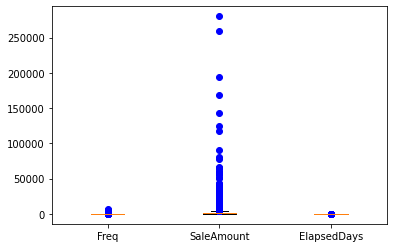

In [ ]:
#현재 데이터 값의 분포 확인하기
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq'], customer_df['SaleAmount'], customer_df['ElapsedDays']], sym='bo')
plt.xticks([1, 2, 3], ['Freq', 'SaleAmount','ElapsedDays' ])

plt.show()

In [ ]:
#데이터 값의 왜곡(치우침)을 줄이기 위한 작업 : 로그 함수로 분포 조정
import numpy as np

customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])

customer_df.head()  #작업 확인용 출력

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log
0,12346,1,77183.60,326,0.693147,11.253955,5.789960
1,12347,182,4310.00,3,5.209486,8.368925,1.386294
2,12348,31,1797.24,76,3.465736,7.494564,4.343805
3,12349,73,1757.55,19,4.304065,7.472245,2.995732
4,12350,17,334.40,311,2.890372,5.815324,5.743003


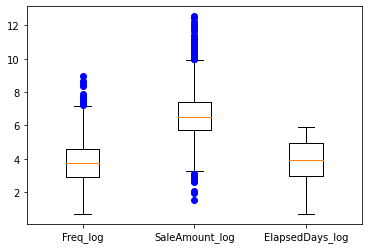

In [ ]:
# 조정된 데이터 분포를 다시 박스플롯으로 확인하기
fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq_log'], customer_df['SaleAmount_log'],customer_df['ElapsedDays_log']], sym='bo')
plt.xticks([1, 2, 3], ['Freq_log', 'SaleAmount_log', 'ElapsedDays_log'])
plt.show()

####[003] 모델 구축 : K-평균 군집화 모델

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
X_features = customer_df[['Freq_log', 'SaleAmount_log', 'ElapsedDays_log']].values

In [ ]:
# 정규 분포로 다시 스케일링하기
from sklearn.preprocessing import StandardScaler

X_features_scaled = StandardScaler().fit_transform(X_features)

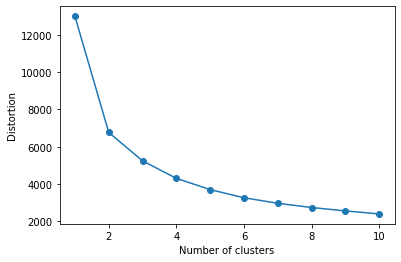

In [ ]:
#최적의 k 찾기 (1) 엘보우 방법
distortions = []

for i in range(1, 11):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모델 생성
    kmeans_i.fit(X_features_scaled)   # 모델 훈련
    distortions.append(kmeans_i.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0) # 모델 생성

# 모델 학습과 결과 예측(클러스터 레이블 생성)
Y_labels = kmeans.fit_predict(X_features_scaled) 

In [ ]:
customer_df['ClusterLabel'] = Y_labels

customer_df.head()  #작업 확인용 출력

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,2
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,1
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,2
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,2
4,12350,17,334.40,311,2.890372,5.815324,5.743003,0


#### [004] 결과 분석 및 시각화

In [ ]:
#최적의 k 찾기 (2) 실루엣 계수에 따른 각 클러스터의 비중 시각화 함수 정의
from matplotlib import cm

def silhouetteViz(n_cluster, X_features): 
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)
    
    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)
    
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster : '+ str(n_cluster)+'\n' \
              + 'Silhouette Score : '+ str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))   
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

In [ ]:
#클러스터 수에 따른 클러스터 데이터 분포의 시각화 함수 정의
def clusterScatter(n_cluster, X_features): 
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster) #클러스터의 색상 설정
        c_colors.append(c_color)
        #클러스터의 데이터 분포를 동그라미로 시각화
        plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1],
                     marker='o', color=c_color, edgecolor='black', s=50, 
                     label='cluster '+ str(i))       
    
    #각 클러스터의 중심점을 삼각형으로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 
                    marker='^', color=c_colors[i], edgecolor='w', s=200)
        
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

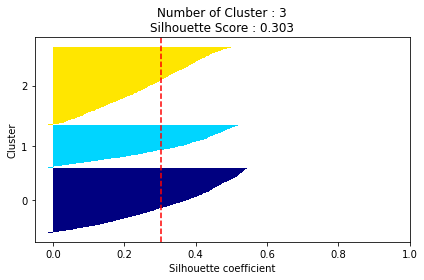

In [ ]:
silhouetteViz(3, X_features_scaled) #클러스터 3개인 경우의 실루엣 score 및 각 클러스터 비중 시각화

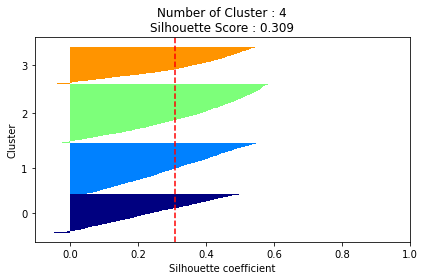

In [ ]:
silhouetteViz(4, X_features_scaled) #클러스터 4개인 경우의 실루엣 score 및 각 클러스터 비중 시각화

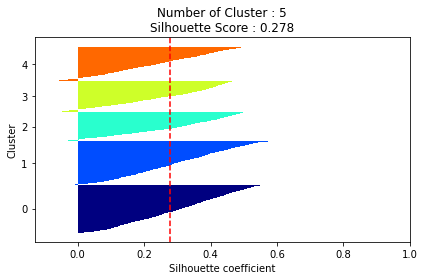

In [ ]:
silhouetteViz(5, X_features_scaled) #클러스터 5개인 경우의 실루엣 score 및 각 클러스터 비중 시각화

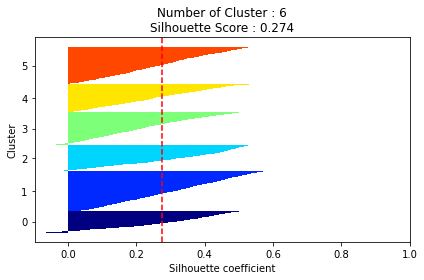

In [ ]:
silhouetteViz(6, X_features_scaled) #클러스터 6개인 경우의 실루엣 score 및 각 클러스터 비중 시각화

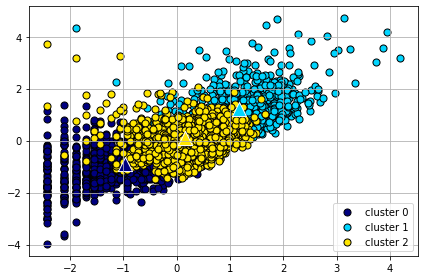

In [ ]:
clusterScatter(3, X_features_scaled) #클러스터 3개인 경우의 클러스터 데이터 분포 시각화

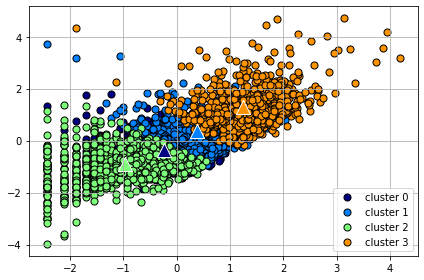

In [ ]:
clusterScatter(4, X_features_scaled)  #클러스터 4개인 경우의 클러스터 데이터 분포 시각화

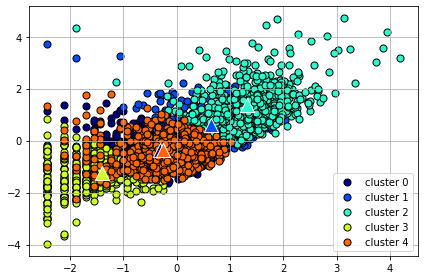

In [ ]:
clusterScatter(5, X_features_scaled)  #클러스터 5개인 경우의 클러스터 데이터 분포 시각화

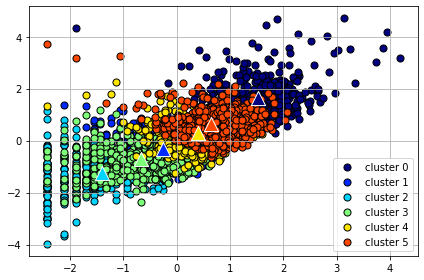

In [ ]:
clusterScatter(6, X_features_scaled)  #클러스터 6개인 경우의 클러스터 데이터 분포 시각화

In [ ]:
#결정된 k를 적용하여 최적의 K-mans 모델 완성
best_cluster = 4

kmeans = KMeans(n_clusters=best_cluster, random_state=0)
Y_labels = kmeans.fit_predict(X_features_scaled)

In [ ]:
customer_df['ClusterLabel'] = Y_labels

customer_df.head()   #작업 확인용 출력

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,1
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,3
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,1
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,1
4,12350,17,334.40,311,2.890372,5.815324,5.743003,2


In [ ]:
#ClusterLabel이 추가된 데이터를 파일로 저장
customer_df.to_csv('Online_Retail_Customer_Cluster.csv')

<< 클러스터 분석하기 >>

In [ ]:
#각 클러스터의 고객수
customer_df.groupby('ClusterLabel')['CustomerID'].count()

ClusterLabel
0     891
1    1207
2    1368
3     872
Name: CustomerID, dtype: int64

In [ ]:
#각 클러스터의 특징
customer_cluster_df = customer_df.drop(['Freq_log', 'SaleAmount_log', 'ElapsedDays_log'],axis=1, inplace=False)

# 주문 1회당 평균 구매금액 : SaleAmountAvg
customer_cluster_df['SaleAmountAvg'] = customer_cluster_df['SaleAmount']/customer_cluster_df['Freq']

customer_cluster_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,ClusterLabel,SaleAmountAvg
0,12346,1,77183.60,326,1,77183.600000
1,12347,182,4310.00,3,3,23.681319
2,12348,31,1797.24,76,1,57.975484
3,12349,73,1757.55,19,1,24.076027
4,12350,17,334.40,311,2,19.670588


In [ ]:
# 클러스터별 분석
customer_cluster_df.drop(['CustomerID'],axis=1, inplace=False).groupby('ClusterLabel').mean()

,Freq,SaleAmount,ElapsedDays,SaleAmountAvg
ClusterLabel,,,,
0,37.811448,603.494053,20.888889,32.256335
1,79.195526,1506.813034,96.000829,102.998219
2,15.052632,298.748151,188.111842,43.338802
3,278.464450,7020.739553,13.612385,96.665836
